## JUDUL: Prediksi Pendapatan Terbesar pada Penjualan Produk Cat dengan Menggunakan Metode Monte Carlo

## LATAR BELAKANG

Ketersediaan produk cat dalam pemenuhan konsumen merupakan permasalah yang harus
di atasi. Keadaan stok suatu barang sangat mempengaruhi pendapatan penjualan. Jumlah
permintaan barang yang meningkat, maka akan memperoleh pendapatan yang besar.
Tujuan dari penelitian ini adalah untuk memprediksi pendapatan penjualan produk cat di
Toko Bangunan UD.
Dapat disimpulkan bahwa perusahaan memerlukan sebuah sistem yang mampu melakukan
prediksi pendapatan penjualan produk cat yang akan memudahkan pihak perusahaaan
untuk melakukan persediaan cat yang banyak diminati oleh konsumen.

## METODE YANG DIGUNAKAN

Metode yang digunakan dalam penelitian ini adalah metode monte carlo. Metode Monte Carlo adalah
suatu metode untuk mengevaluasi secara berulang suatu model deterministik menggunakan himpunan
bilangan acak sebagai masukan, Metode Monte Carlo pada dasarnya digunakan sebagai prosedur numerik
untuk menaksir nilai ekspektasi dari suatu peubah acak . Metode Monte Carlo merupakan perhitungan numerik
yang mengandung intergral multidimensi yang digunakan dalam komputasi keuangan. Kelebihan metode
Monte Carlo diantaranya:

1.  Metode monte carlo ini dapat mengevaluasi pengaruh atau hubungan, maupun
    dampak dari peristiwa risiko.

2.  Metode monte carlo ini mampu mengakomodasi berbagai jenis distribusi dalam
    variabel input.

3.  Metode monte carlo ini menggunakan permodelan yang relatif sederhana dan
    mudah untuk dikembangkan atau diperluas sesuai kebutuhan analisis yang muncul.

4.  Metode monte carlo ini menyajikan pengukuran keakuratan hasil.


## IMPORT LIBRARY

In [1295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f
import random

PENJELASAN LIBRARY:

numpy: menyediakan fungsi yang siap pakai untuk memudahkan kita melakukan perhitungan saintifik seperti matriks, aljabar, statistik, dan sebagainya.

pandas: untuk memproses data, mulai pembersihan data, manipulasi data, hingga melakukan analisis data.

matplotlib.pyplot: untuk melakukan visualisasi data secara 2D maupun 3D dan menghasilkan suatu gambar yang berkualitas bahkan dapat disimpan dengan format gambar seperti JPEG, JPG, dan PNG.

scipy.stats: menyediakan rutinitas numerik yang mudah digunakan dan efisien untuk aljabar linier, statistik, integrasi, dan optimisasi. Penggunannya meliputi pemrosesan gambar multidimensi, penyelesaian transformasi Fourier, dan persamaan diferensial.

random: untuk menghasilkan bilangan acak/random

## Akses Data Set

In [1296]:
# Data grup dari file Excel
data = pd.read_excel('DataSet.xlsx', engine='openpyxl', header=None, usecols="A:B", skiprows=1)
group1 = np.array(data.iloc[:, 0], dtype=int)
group2 = np.array(data.iloc[:, 1], dtype=int)

print("Data 1:",group1)
print("Data 2:",group2)

# Menghitung total jumlah kejadian
total_count = sum(group1)

# Menghitung demand probability untuk setiap permintaan
demand_probability = [round(count / total_count, 2) for count in group1]

print("Demand Probability:", demand_probability)

Data 1: [11  6  4 10 12  3  3  4 12  2  4  4]
Data 2: [12  3  6 10  3  6 12  4  4  6 11 12]
Demand Probability: [0.15, 0.08, 0.05, 0.13, 0.16, 0.04, 0.04, 0.05, 0.16, 0.03, 0.05, 0.05]


## UJI NORMALISASI

    Data  Rank    Indeks  Formula Z-Score       PDF
0   0.15    10  0.785714         0.791639  0.291626
1   0.08     8  0.622449         0.311919  0.380000
2   0.05     4  0.295918        -0.536176  0.345528
3   0.13     9  0.704082         0.536176  0.345528
4   0.16    11  0.867347         1.113937  0.214517
5   0.04     2  0.132653        -1.113937  0.214517
6   0.04     2  0.132653        -1.113937  0.214517
7   0.05     4  0.295918        -0.536176  0.345528
8   0.16    11  0.867347         1.113937  0.214517
9   0.03     1  0.051020        -1.635039  0.104809
10  0.05     4  0.295918        -0.536176  0.345528
11  0.05     4  0.295918        -0.536176  0.345528
Correlation =  0.9517954081175038
Hasil : Data Normal


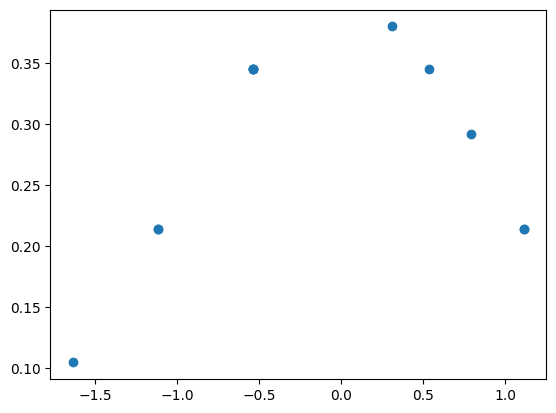

In [1297]:
Norm = pd.DataFrame({"Data": demand_probability})


Norm["Rank"] = Norm["Data"].rank(method="min", ascending=True).astype(int)
Norm["Indeks"] = (Norm["Rank"] - 3 / 8) / (len(Norm) + 1 / 4)
Norm["Formula Z-Score"] = stats.norm.ppf(Norm["Indeks"], 0, 1)
Norm["PDF"] = stats.norm.pdf(Norm["Formula Z-Score"], loc=0, scale=1)

corr = Norm["Data"].corr(Norm["Formula Z-Score"])
print(Norm)
print("Correlation = ", corr)
if corr > 0.05:
    print("Hasil : Data Normal")
else:
    print("Hasil : Data Tidak Normal")

plt.scatter(Norm["Formula Z-Score"], Norm["PDF"])


plt.show()

PENJELASAN UJI NORMALISASI:



Pertama-tama kita perlu membuat variabel Norm dengan fungsi DataFrame yang berisi satu kolom yang berisi serangkaian niali numerik sesuai dengan isi pada code di atas.

Menambahkan kolom Rank ke dalam DataFrame untuk memberikan rank ke setiap nilai.

Menambahkan kolom Indeks ke dalam DataFrame untuk menghitung nilai indeks relatif seriap nilai dalam distribusi data.

Menambahkan kolom "Formula Z-Score" ke DataFrame "Norm" yang menghitung skor Z (Z-Score) untuk setiap nilai berdasarkan indeks.

Menambahkan kolom "PDF" ke DataFrame "Norm" yang menghitung fungsi densitas probabilitas (PDF) berdasarkan skor Z.

Setelah itu kita perlub menghitung korelasi antara kolom "Data" dan kolom "Formula Z-Score" menggunakan corr.

Lalu Norm dan korelasi akan diprint dan dibawahnya akan ada dua kondisi ika nilai korelasi lebih besar dari 0.05, dicetak "Hasil : Data Normal", jika tidak, dicetak "Hasil : Data Tidak Normal".

Terakhir kita akan Melakukan visualisasi dengan scatter plot yang menampilkan hubungan antara kolom "Formula Z-Score" dan kolom "PDF" dari DataFrame "Norm".

## UJI HOMOGENITAS

In [1298]:
def levene_test(group1, group2):
    n1 = len(group1)
    n2 = len(group2)

    mean1 = np.mean(group1)
    mean2 = np.mean(group2)

    squared_dev1 = np.square(group1 - mean1)
    squared_dev2 = np.square(group2 - mean2)

    variance1 = np.sum(squared_dev1) / (n1 - 1) if n1 > 1 else np.nan
    variance2 = np.sum(squared_dev2) / (n2 - 1) if n2 > 1 else np.nan

    if np.isnan(variance1) or np.isnan(variance2):
        return np.nan, np.nan

    statistic = (variance1 / variance2) if variance1 >= variance2 else (variance2 / variance1)
    df1 = n1 - 1
    df2 = n2 - 1

    p_value = 1 - f.cdf(statistic, df1, df2)

    return statistic, p_value

statistic, pvalue = levene_test(group1, group2)

print("Statistik Levene:", statistic)
print("Nilai P-Value:", pvalue)

alpha = 0.05
if np.isnan(statistic) or np.isnan(pvalue):
    print("Tidak dapat menghitung uji Levene")
elif pvalue > alpha:
    print("Hasil Hipotesis Data Dapat Bernilai 0 (Homogen)")
else:
    print("Hasil Hipotesis Data Tidak Dapat Bernilai 0 (Non-Homogen)")

Statistik Levene: 1.075096631695196
Nilai P-Value: 0.45328258189966075
Hasil Hipotesis Data Dapat Bernilai 0 (Homogen)


PENJELASAN UJI HOMOGENITAS:



Mendefinisikan fungsi levene_test yang menerima dua parameter: group1 dan group2. Fungsi ini akan mengembalikan statistik uji Levene dan nilai p-value.

Menghitung jumlah data pada group1 dan group2 dengan menggunakan len() dan menyimpannya dalam variabel n1 dan n2.

Menghitung rata-rata dari group1 dan group2 dengan menggunakan np.mean() dan menyimpannya dalam variabel mean1 dan mean2.

Menghitung kuadrat selisih antara setiap nilai dalam group1 dan mean1, serta group2 dan mean2 dengan menggunakan np.square(). Hasilnya disimpan dalam variabel squared_dev1 dan squared_dev2.

Menghitung variansi dari group1 dan group2 dengan membagi jumlah kuadrat selisih dengan (n-1), dimana n adalah jumlah data dalam kelompok. Variansinya disimpan dalam variabel variance1 dan variance2.

Menghitung nilai statistik uji Levene dengan membandingkan varian maksimum dan varian minimum. Jika varian maksimum lebih besar atau sama dengan varian minimum, maka nilai statistik adalah varian maksimum dibagi varian minimum. Jika tidak, nilai statistik adalah varian minimum dibagi varian maksimum. Hasilnya disimpan dalam variabel statistic.

Menghitung derajat kebebasan (degrees of freedom) dengan mengurangi 1 dari jumlah data dalam masing-masing kelompok. Derajat kebebasan disimpan dalam variabel df1 dan df2.

Menghitung nilai p-value dengan menggunakan fungsi distribusi kumulatif F (cdf) dari paket scipy.stats.f. Nilai p-value didapatkan dengan menghitung area di ekor kanan distribusi F, yaitu 1 dikurangi cdf dari statistik uji dan derajat kebebasan. Nilai p-value disimpan dalam variabel p_value.

Mencetak nilai statistik uji Levene dan nilai p-value dengan menggunakan perintah print("Statistik Levene:", statistic) dan print("Nilai p:", pvalue).

Menetapkan tingkat signifikansi alpha yang akan digunakan untuk pengujian. Dalam kasus ini, alpha diatur sebagai 0.05.

Melakukan pengujian kondisi if pvalue > alpha untuk mengevaluasi apakah nilai p-value lebih besar dari alpha. Jika ya, maka dicetak "Tidak ada bukti yang cukup untuk menolak hipotesis nol (homogen)". Jika tidak, dicetak "Ada bukti yang cukup untuk menolak hipotesis nol (tidak homogen)".

## === PROGRAM METODE CARLO ====

Disini kami melakukan perhitungan monte carlo berdasarkan jurnal yang kami ambil sebagai judul juga

Jurnal ini berjudul "Prediksi Pendapatan Terbesar pada Penjualan Produk Cat dengan
Menggunakan Metode Monte Carlo" dan pembuatnya adalah Bias Yulisa Geni, Julius Santony, Sumijan dari Universitas Putra Indonesia YPTK Padang

In [1299]:
# Distribusi kumulatif permintaan
demand_cumulative = []
cumulative_sum = 0

for probability in demand_probability:
    cumulative_sum += probability
    demand_cumulative.append(cumulative_sum)

print([round(elem, 2) for elem in demand_cumulative])

[0.15, 0.23, 0.28, 0.41, 0.57, 0.61, 0.65, 0.7, 0.86, 0.89, 0.94, 0.99]


In [1300]:
# Menghitung total permintaan
total_demand = sum([i for i in range(12)])

# Simulasi selama 12 Bulan
month = 12
total_sales = 0

In [1301]:
print("Total Permintaan: ", total_demand)

Total Permintaan:  66


In [1302]:
data_real = []
total_real = 0

for probability in group1:
    total_real += probability
    data_real.append(total_real)

In [1303]:
sales_per_day = []

for day in range(month):
    random_num = random.uniform(0, 1)
    
    demand = 0 
    
    for i in range(len(demand_cumulative)):
        if random_num < demand_cumulative[i]:
            demand = i
            break
    
    sales_per_day.append(demand)

print("Penjualan per hari:", sales_per_day)

total_sales = np.sum(sales_per_day)
print("Total penjualan dalam sebulan:", total_sales)


Penjualan per hari: [5, 11, 11, 3, 4, 3, 4, 6, 10, 0, 4, 10]
Total penjualan dalam sebulan: 71


## DATA ASLI

In [1304]:
print("Total permintaan selama 12 bulan: ", total_real)
sum_real = total_real*150000
print("Total pendapatan Rp. ",sum_real)

Total permintaan selama 12 bulan:  75
Total pendapatan Rp.  11250000


## SETELAH PERHITUNGAN MONTE CARLO

In [1305]:
print("Total permintaan selama 12 bulan: ", total_sales)
sum_monte = total_sales*150000
print("Total pendapatan Rp. ",sum_monte)

Total permintaan selama 12 bulan:  71
Total pendapatan Rp.  10650000


## PERBANDINGAN KEDUA DATA

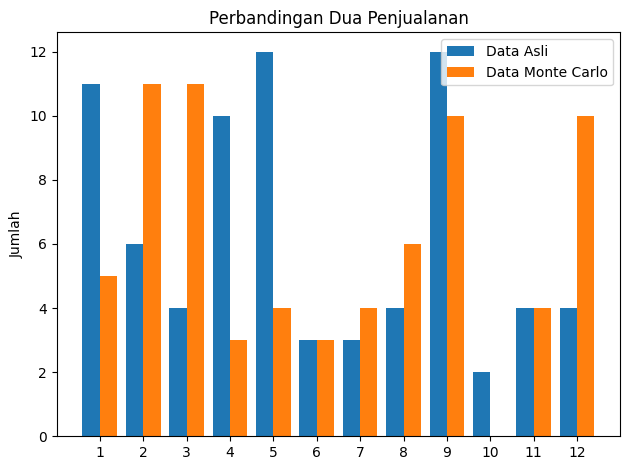

In [1306]:
x = np.arange(len(group1))
width = 0.4

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, group1, width, label='Data Asli')
rects2 = ax.bar(x + width/2, sales_per_day, width, label='Data Monte Carlo')

ax.set_ylabel('Jumlah')
ax.set_title('Perbandingan Dua Penjualanan')
ax.set_xticks(x)
ax.set_xticklabels(x + 1)
ax.legend()

fig.tight_layout()

plt.show()

## PERBANDINAN RATA-RATA KEDUA DATA

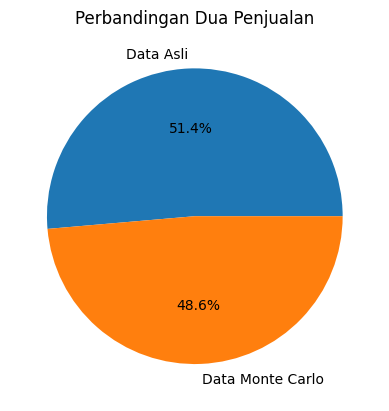

In [1307]:
data_labels = ['Data Asli', 'Data Monte Carlo']
data = [total_real, total_sales]

fig, ax = plt.subplots()
ax.pie(data, labels=data_labels, autopct='%1.1f%%')
ax.set_title('Perbandingan Dua Penjualan')

plt.show()

## PERSENTASE HASIL PREDIKSI

In [1308]:
if total_sales > total_real:
    predik = (total_real / total_sales) * 100
else:
    predik = (total_sales / total_real) * 100
print("Akurasi Hasil Prediksi:", predik, "%")

Akurasi Hasil Prediksi: 94.66666666666667 %


Setelah melakukan perhitungan monte carlo di atas kami melakukan proses pengujian. Disini kami memakai "Uji Konvergensi" di dalam melakukan pengujian dikarenakan kami ingin menghitung seberapa konvergen perhitungan "Data Asli" dengan perhitungan data "Setelah Perhitungan Monte Carlo". 

Dalam konteks ini, Uji konvergensi dapat digunakan untuk memeriksa sejauh mana perhitungan Monte Carlo mendekati solusi yang akurat saat jumlah sampel acak meningkat. Dengan meningkatkan jumlah sampel acak, perkiraan Monte Carlo akan cenderung konvergen ke solusi yang benar, dan uji konvergensi dapat membantu memantau tingkat kesalahan yang tersisa.

Disini kami mengambil referensi pengujian konvergensi dari jurnal yang berjudul "ANALISIS KONVERGENSI PERTUMBUHAN EKONOMI PROVINSI
JAWA BARAT TAHUN 2007-2016" yang dibuat oleh Muhammad Gyda Aulia, Dwi Budi Santoso dari Fakultas Ekonomi dan Bisnis, Universitas Brawijaya. disini mereka menguji tingkat ekonomi dari beberapa daerah.

Sama seperti kami disini kami ingin menguji 2 data yaitu "Data Asli" dengan perhitungan data "Setelah Perhitungan Monte Carlo". 

## UJI KONVERGENSI

In [1309]:
def is_absolute_convergent(series1, series2):
    absolute_series1 = np.abs(series1)
    absolute_series2 = np.abs(series2)
    
    series1_sum = np.sum(absolute_series1)
    series2_sum = np.sum(absolute_series2)
    
    if np.isfinite(series1_sum) and np.isfinite(series2_sum):
        if series1_sum < series2_sum:
            return "Perkiraan Perkembangan Penjualan Produk Cat Cenderung Secara Konvergen Lebih Cepat"
        elif series2_sum < series1_sum:
            return "Perkiraan Perkembangan Penjualan Produk Cat Cenderung Secara Konvergen Lebih Lambat"
        else:
            return "Perkiraan Perkembangan Penjualan Produk Cat Cenderung Secara Konvergen Sama Cepat"
    else:
        return "Perkiraan Perkembangan Penjualan Produk Cat Cenderung Secara Konvergen Tidak Berkembang"

result = is_absolute_convergent(total_real, sales_per_day)
print(result)


Perkiraan Perkembangan Penjualan Produk Cat Cenderung Secara Konvergen Lebih Lambat


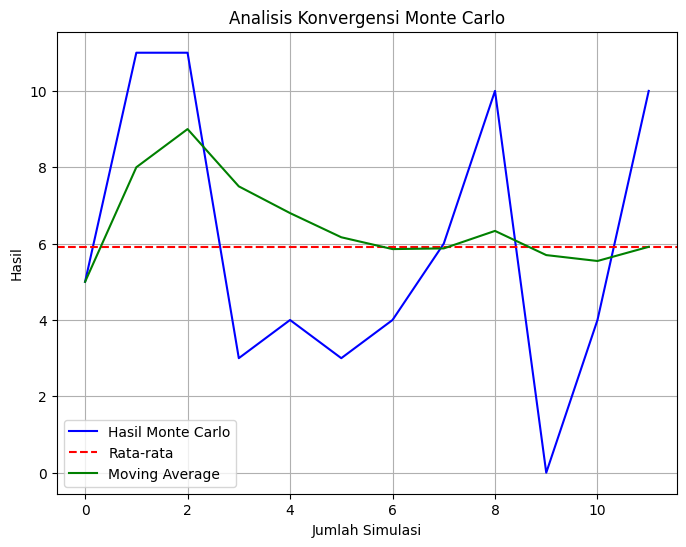

In [1310]:
monte_carlo_results = sales_per_day
# Menghitung rata-rata per ulangan
mean_results = np.mean(monte_carlo_results)

# Menghitung variansi per ulangan
variance_results = np.var(monte_carlo_results)

# Menghitung moving average (rata-rata bergerak)
moving_average = np.cumsum(monte_carlo_results) / np.arange(1, len(monte_carlo_results) + 1)

# Plot hasil analisis konvergensi
plt.figure(figsize=(8, 6))
plt.plot(monte_carlo_results, 'b-', label='Hasil Monte Carlo')
plt.axhline(y=mean_results, color='r', linestyle='--', label='Rata-rata')
plt.plot(moving_average, 'g-', label='Moving Average')
plt.xlabel('Jumlah Simulasi')
plt.ylabel('Hasil')
plt.title('Analisis Konvergensi Monte Carlo')
plt.legend()
plt.grid(True)
plt.show()


PENJELASAN UJI KONVERGENSI

Variabel "monte_carlo_results" merupakan data hasil dari simulasi Monte Carlo yang sudah dilakukan sebelumnya. Data ini mewakili hasil penjualan per hari dari setiap simulasi.

Menghitung rata-rata dari "monte_carlo_results" dengan menggunakan fungsi np.mean(). Rata-rata ini mencerminkan nilai yang diharapkan dari hasil penjualan.

Menghitung variansi dari "monte_carlo_results" dengan menggunakan fungsi np.var(). Variansi ini menggambarkan seberapa bervariasinya hasil penjualan dalam setiap simulasi.

Menghitung moving average (rata-rata bergerak) dari "monte_carlo_results". Moving average ini adalah rata-rata hasil penjualan yang dihitung dengan mengambil rata-rata kumulatif dari setiap simulasi.

Melakukan visualisasi dengan menggunakan matplotlib untuk menggambarkan analisis konvergensi Monte Carlo. Hasil penjualan dalam setiap simulasi ditampilkan dalam garis biru. Garis merah yang putus-putus menunjukkan nilai rata-rata hasil penjualan. Garis hijau menunjukkan moving average dari hasil penjualan.

Menambahkan label sumbu x dan sumbu y dengan menggunakan plt.xlabel() dan plt.ylabel(). Memberikan judul pada grafik dengan plt.title(). Menambahkan legenda dengan plt.legend() untuk menjelaskan masing-masing garis pada grafik. Menampilkan grid dengan plt.grid(True) untuk membantu membaca grafik yang dihasilkan.

Terakhir, menampilkan grafik menggunakan plt.show().

## KESIMPULAN

Berdasarkan dari proses perhitungan sebelumnya yang telah dilakukan oleh penulis, maka penulis membuat
kesimpulan bahwa :

1.  Dari hasil dan pembahasan dapat diketahui tingkat akurasi prediksi pendapatan penjualan produk cat
    Lenkote Supersilk untuk tahun 2017, dimana dalam satu bulan terdapat transaksi penjualan produk cat
    sebanyak 15 produk adalah sebesar 84,3%. Untuk tingkat akurasi seluruh penjualan produk cat adalah 89
    %. Dari hasil tersebut, diambil kesimpulan bahwa metode monte carlo dapat melakukan prediksi
    pendapatan penjualan produk cat.

2.  Dengan berhasilnya penerapan metode monte carlo dalam memprediksi pendapatan penjualan produk
    maka akan memberikan kemudahan pada pihak pimpinan di Toko bangunan UD. Masdi untuk
    mengetahui jumlah pendapatan penjualan produk cat dengan cepat sehingga membantu pihak
    pimpinan untuk mengambil keputusan dalam pengambilan ketersediaan produk cat yang dapat dilihat
    pada proses simulasi menunjukkan produk cat mana yang memberikan pendapatan penjualan yang lebih tinggi.

3.  Dari hasil pengujian di atas setelah mencari 3 nilai yaitu hasil monte carlo, rata-rata, dan moving average kita bisa melihat seberapa      konvergen data asli dengan data setelah perhitungan monte carlo. dikarenakan perhitungan monte carlo menggunakan bilangan acak jadi setiap kami melakukan perhitungan maka hasilnya berubah-ubah. Setelah melakukan beberapa perhitungan dan pengujian serta memerhatikan grafik uji konvergen kami mendapatkan hasil pengujian yang paling konvergen yakni __%
    
